#                                   Telecom Churn Case Study

### Steps involved in the Assignment
- Data Understanding
- Data Cleaning/Preparation
- EDA
- Filter high value customers according to pareto rule(top 30% customers generating high revenue)
- Data Preprocessing
- Model building
- Model Evaluation
- Recommendations

## Data Understanding

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [4]:
#Importing data into data frame
churn_df = pd.read_csv("telecom_churn_data.csv")

In [5]:
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
#Checking the shape of data frame
churn_df.shape

(99999, 226)

In [7]:
#checking the datatypes
churn_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [8]:
# Describing data
churn_df.describe(include = 'all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

Data frame consists of 99,999 rows and 226 attributes
No target column available.
Need to derive target column using 9th month data.
4 months of customer usage data(outgoing,incoming,dates,arpu's for 4 mnths etc..), is present in columnar format
From the given problem statement
   - 6th & 7th months are good phase
   - 8th month is action phase
   - 9th month is churn phase
mobile_number and circle_id serve same purpose of index and doesn't have any impact on churn.Both the columns can be dropped.

In [9]:
col_names = list(churn_df.columns)

In [10]:
#index columns serve same purpose of index and should not be included in model building
index_col =['mobile_number','circle_id']
# columns with date
date_col = [col for col in col_names if 'date' in col]
date_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [11]:
churn_df.shape

(99999, 226)

In [12]:
#Dropping both index and date columns 
churn_df.drop(index_col,inplace=True,axis=1)
churn_df.drop(date_col,inplace=True,axis=1)

In [13]:
churn_df.shape

(99999, 212)

## Data Cleaning/Preparation

### 1. Missing Value treatment

In [14]:
#Checking the null value percentage
percent_missing = round(((churn_df.isnull().sum()/churn_df.shape[0])*100),2).reset_index()
percent_missing.columns = ['Features','% Missing_values']
percent_missing=percent_missing.sort_values(by= "% Missing_values",ascending=False)
percent_missing

,Features,% Missing_values
151,max_rech_data_6,74.85
147,total_rech_data_6,74.85
155,count_rech_2g_6,74.85
203,fb_user_6,74.85
159,count_rech_3g_6,74.85
163,av_rech_amt_data_6,74.85
175,arpu_3g_6,74.85
179,arpu_2g_6,74.85
183,night_pck_user_6,74.85
152,max_rech_data_7,74.43


In [15]:
#Creating the list of Features with Missing% < 70 and storing it in keep_col
keep_col =  list(percent_missing[percent_missing["% Missing_values"]<70]["Features"])
keep_col

['loc_og_t2m_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2o_mou_9',
 'std_og_t2c_mou_9',
 'roam_og_mou_9',
 'std_ic_t2m_mou_9',
 'std_og_mou_9',
 'loc_ic_mou_9',
 'isd_og_mou_9',
 'std_ic_mou_9',
 'loc_ic_t2f_mou_9',
 'spl_og_mou_9',
 'loc_ic_t2m_mou_9',
 'og_others_9',
 'roam_ic_mou_9',
 'loc_ic_t2t_mou_9',
 'std_og_t2f_mou_9',
 'std_ic_t2f_mou_9',
 'offnet_mou_9',
 'spl_ic_mou_9',
 'loc_og_t2f_mou_9',
 'onnet_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2c_mou_9',
 'ic_others_9',
 'loc_og_mou_9',
 'isd_ic_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_ic_t2m_mou_8',
 'isd_ic_mou_8',
 'std_ic_t2t_mou_8',
 'offnet_mou_8',
 'loc_ic_mou_8',
 'ic_others_8',
 'std_ic_t2f_mou_8',
 'loc_ic_t2f_mou_8',
 'spl_ic_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'std_ic_t2o_mou_8',
 'onnet_mou_8',
 'std_ic_mou_8',
 'roam_ic_mou_8',
 'loc_og_mou_8',
 'isd_og_mou_8',
 'std_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2t_mou_8',
 'spl_og_mou_8',
 'roam_og_mou_8',
 'loc_og_t2c_

In [16]:
churn_df = churn_df[keep_col]
churn_df.shape

(99999, 176)

In [17]:
#Checking the null value percentage after dropping high percentage missing value features
percent_missing = round(((churn_df.isnull().sum()/churn_df.shape[0])*100),2).reset_index()
percent_missing.columns = ['Features','% Missing_values']
percent_missing=percent_missing.sort_values(by= "% Missing_values",ascending=False)
percent_missing

,Features,% Missing_values
0,loc_og_t2m_mou_9,7.75
15,loc_ic_t2t_mou_9,7.75
1,std_ic_t2t_mou_9,7.75
28,std_og_t2m_mou_9,7.75
27,std_og_t2t_mou_9,7.75
26,isd_ic_mou_9,7.75
25,loc_og_mou_9,7.75
24,ic_others_9,7.75
23,loc_og_t2c_mou_9,7.75
22,loc_og_t2t_mou_9,7.75


In [18]:
#unique val counts
unique_vals = churn_df.nunique().sort_values(ascending=True).reset_index()
unique_vals.columns = ['Feature','Unique_value_count']
unique_vals

,Feature,Unique_value_count
0,std_ic_t2o_mou_7,1
1,std_og_t2c_mou_8,1
2,std_og_t2c_mou_6,1
3,std_og_t2c_mou_7,1
4,loc_ic_t2o_mou,1
5,std_og_t2o_mou,1
6,std_ic_t2o_mou_8,1
7,std_og_t2c_mou_9,1
8,std_ic_t2o_mou_9,1
9,std_ic_t2o_mou_6,1


In [19]:
#Features with only single value
single_val_col= list(unique_vals[unique_vals["Unique_value_count"] == 1]["Feature"])
single_val_col

['std_ic_t2o_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'loc_ic_t2o_mou',
 'std_og_t2o_mou',
 'std_ic_t2o_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_t2o_mou_6',
 'loc_og_t2o_mou']

In [20]:
#shape of data frame before dropping
churn_df.shape

(99999, 176)

In [21]:
#Dropping single_val_col
churn_df.drop(single_val_col,inplace=True,axis=1)

In [22]:
#shape of the data frame after dropping
churn_df.shape

(99999, 165)

### 2. Iterative imputer for Missing values

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [28]:
imputer = IterativeImputer()

In [29]:
imputed = imputer.fit_transform(churn_df)

In [31]:
df_imputed = pd.DataFrame(imputed,columns = churn_df.columns)
df_imputed.isnull().sum()

loc_og_t2m_mou_9      0
std_ic_t2t_mou_9      0
roam_og_mou_9         0
std_ic_t2m_mou_9      0
std_og_mou_9          0
loc_ic_mou_9          0
isd_og_mou_9          0
std_ic_mou_9          0
loc_ic_t2f_mou_9      0
spl_og_mou_9          0
loc_ic_t2m_mou_9      0
og_others_9           0
roam_ic_mou_9         0
loc_ic_t2t_mou_9      0
std_og_t2f_mou_9      0
std_ic_t2f_mou_9      0
offnet_mou_9          0
spl_ic_mou_9          0
loc_og_t2f_mou_9      0
onnet_mou_9           0
loc_og_t2t_mou_9      0
loc_og_t2c_mou_9      0
ic_others_9           0
loc_og_mou_9          0
isd_ic_mou_9          0
std_og_t2t_mou_9      0
std_og_t2m_mou_9      0
std_ic_t2m_mou_8      0
isd_ic_mou_8          0
std_ic_t2t_mou_8      0
offnet_mou_8          0
loc_ic_mou_8          0
ic_others_8           0
std_ic_t2f_mou_8      0
loc_ic_t2f_mou_8      0
spl_ic_mou_8          0
loc_ic_t2m_mou_8      0
loc_ic_t2t_mou_8      0
onnet_mou_8           0
std_ic_mou_8          0
roam_ic_mou_8         0
loc_og_mou_8    

In [33]:
print(churn_df.shape)
print(df_imputed.shape)

(99999, 165)
(99999, 165)


In [35]:
churn_df.head(10)

,loc_og_t2m_mou_9,std_ic_t2t_mou_9,roam_og_mou_9,std_ic_t2m_mou_9,std_og_mou_9,loc_ic_mou_9,isd_og_mou_9,std_ic_mou_9,loc_ic_t2f_mou_9,spl_og_mou_9,loc_ic_t2m_mou_9,og_others_9,roam_ic_mou_9,loc_ic_t2t_mou_9,std_og_t2f_mou_9,std_ic_t2f_mou_9,offnet_mou_9,spl_ic_mou_9,loc_og_t2f_mou_9,onnet_mou_9,loc_og_t2t_mou_9,loc_og_t2c_mou_9,ic_others_9,loc_og_mou_9,isd_ic_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_ic_t2m_mou_8,isd_ic_mou_8,std_ic_t2t_mou_8,offnet_mou_8,loc_ic_mou_8,ic_others_8,std_ic_t2f_mou_8,loc_ic_t2f_mou_8,spl_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_t2t_mou_8,onnet_mou_8,std_ic_mou_8,roam_ic_mou_8,loc_og_mou_8,isd_og_mou_8,std_og_t2m_mou_8,loc_og_t2f_mou_8,std_og_t2f_mou_8,std_og_t2t_mou_8,spl_og_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,std_og_mou_8,og_others_8,loc_og_t2m_mou_8,loc_og_t2t_mou_8,std_ic_mou_6,loc_ic_t2t_mou_6,spl_ic_mou_6,loc_og_t2c_mou_6,std_og_t2m_mou_6,isd_ic_mou_6,loc_og_mou_6,std_og_t2t_mou_6,ic_others_6,offnet_mou_6,onnet_mou_6,std_og_t2f_mou_6,std_og_mou_6,spl_og_mou_6,roam_ic_mou_6,loc_ic_t2m_mou_6,roam_og_mou_6,loc_ic_t2f_mou_6,og_others_6,loc_ic_mou_6,loc_og_t2t_mou_6,loc_og_t2f_mou_6,std_ic_t2t_mou_6,loc_og_t2m_mou_6,std_ic_t2m_mou_6,isd_og_mou_6,std_ic_t2f_mou_6,offnet_mou_7,loc_og_t2c_mou_7,loc_og_t2m_mou_7,roam_og_mou_7,loc_og_t2f_mou_7,onnet_mou_7,loc_og_t2t_mou_7,loc_ic_t2t_mou_7,loc_og_mou_7,std_ic_t2f_mou_7,roam_ic_mou_7,og_others_7,loc_ic_t2f_mou_7,loc_ic_mou_7,spl_og_mou_7,std_ic_t2t_mou_7,isd_og_mou_7,std_ic_t2m_mou_7,std_og_mou_7,ic_others_7,std_ic_mou_7,std_og_t2f_mou_7,std_og_t2m_mou_7,spl_ic_mou_7,isd_ic_mou_7,std_og_t2t_mou_7,loc_ic_t2m_mou_7,last_day_rch_amt_9,monthly_3g_7,total_og_mou_6,arpu_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_8,total_og_mou_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,arpu_8,arpu_7,arpu_6,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_og_mou_7,total_og_mou_9,last_day_rch_amt_8,total_ic_mou_6,last_day_rch_amt_7,last_day_rch_amt_6,max_rech_amt_9,max_rech_amt_8,max_rech_amt_7,max_rech_amt_6,total_rech_amt_9,total_rech_amt_8,total_rech_amt_7,total_rech_amt_6,total_rech_num_9,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,total_rech_num_7,total_rech_num_6,total_ic_mou_9,total_ic_mou_8,total_ic_mou_7,sep_vbc_3g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,5.44,0.00,0.00,1.15,0.00,4.13,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.00,21.100,0,0,0,0,0,0,0,0,1,1,0.00,0,0,0,0,0,213.803,214.816,197.385,968,30.40,0.00,101.20,0.00,0.00,252,0.00,252,252,0,252,252,252,0,252,252,362,6,2,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,3,4,0.00,5.44,0.00,3.58
1,53.76,0.00,0.00,15.01,0.00,173.03,0.0,15.01,0.00,0.00,56.93,0.00,0.00,116.09,0.00,0.00,53.76,0.00,0.00,18.34,18.34,0.00,0.00,72.11,0.00,0.00,0.00,12.49,0.00,2.35,304.76,408.43,0.00,0.00,3.61,0.00,375.58,29.23,7.68,14.84,0.00,299.54,0.00,0.13,0.00,0.00,0.00,12.76,0.00,0.00,0.13,0.0,291.86,7.68,5.90,1.61,0.00,0.00,0.00,1.83,35.39,0.23,0.00,15.74,24.11,0.00,0.23,4.68,0.00,17.48,0.00,0.00,0.00,19.09,23.88,0.00,0.00,11.51,5.90,0.0,0.00,99.84,2.91,75.94,0.00,0.00,78.68,74.56,29.91,150.51,0.00,0.00,0.0,8.93,104.23,23.43,0.00,0.00,0.00,4.58,0.00,0.00,0.00,0.46,0.00,0.00,4.11,65.38,0,0,40.31,86.285,0,1,0,0,0,0,2,0,0,0,312.44,0,0,0,0,0,268.321,355.074,34.047,1006,0.00,0.00,0.00,178.53,72.11,30,26.83,23,44,50,65,154,44,121,283,384,74,5,11,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,9,4,188.04,423.28,104.23,0.00
2,28.16,49.44,70.94,118.18,18.04,345.41,0.0,171.49,158.19,42.08,38.98,0.00,38.49,148.23,0.00,3.86,118.91,0.45,22.24,74.81,14.39,0

In [36]:
df_imputed.head(10)

,loc_og_t2m_mou_9,std_ic_t2t_mou_9,roam_og_mou_9,std_ic_t2m_mou_9,std_og_mou_9,loc_ic_mou_9,isd_og_mou_9,std_ic_mou_9,loc_ic_t2f_mou_9,spl_og_mou_9,loc_ic_t2m_mou_9,og_others_9,roam_ic_mou_9,loc_ic_t2t_mou_9,std_og_t2f_mou_9,std_ic_t2f_mou_9,offnet_mou_9,spl_ic_mou_9,loc_og_t2f_mou_9,onnet_mou_9,loc_og_t2t_mou_9,loc_og_t2c_mou_9,ic_others_9,loc_og_mou_9,isd_ic_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_ic_t2m_mou_8,isd_ic_mou_8,std_ic_t2t_mou_8,offnet_mou_8,loc_ic_mou_8,ic_others_8,std_ic_t2f_mou_8,loc_ic_t2f_mou_8,spl_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_t2t_mou_8,onnet_mou_8,std_ic_mou_8,roam_ic_mou_8,loc_og_mou_8,isd_og_mou_8,std_og_t2m_mou_8,loc_og_t2f_mou_8,std_og_t2f_mou_8,std_og_t2t_mou_8,spl_og_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,std_og_mou_8,og_others_8,loc_og_t2m_mou_8,loc_og_t2t_mou_8,std_ic_mou_6,loc_ic_t2t_mou_6,spl_ic_mou_6,loc_og_t2c_mou_6,std_og_t2m_mou_6,isd_ic_mou_6,loc_og_mou_6,std_og_t2t_mou_6,ic_others_6,offnet_mou_6,onnet_mou_6,std_og_t2f_mou_6,std_og_mou_6,spl_og_mou_6,roam_ic_mou_6,loc_ic_t2m_mou_6,roam_og_mou_6,loc_ic_t2f_mou_6,og_others_6,loc_ic_mou_6,loc_og_t2t_mou_6,loc_og_t2f_mou_6,std_ic_t2t_mou_6,loc_og_t2m_mou_6,std_ic_t2m_mou_6,isd_og_mou_6,std_ic_t2f_mou_6,offnet_mou_7,loc_og_t2c_mou_7,loc_og_t2m_mou_7,roam_og_mou_7,loc_og_t2f_mou_7,onnet_mou_7,loc_og_t2t_mou_7,loc_ic_t2t_mou_7,loc_og_mou_7,std_ic_t2f_mou_7,roam_ic_mou_7,og_others_7,loc_ic_t2f_mou_7,loc_ic_mou_7,spl_og_mou_7,std_ic_t2t_mou_7,isd_og_mou_7,std_ic_t2m_mou_7,std_og_mou_7,ic_others_7,std_ic_mou_7,std_og_t2f_mou_7,std_og_t2m_mou_7,spl_ic_mou_7,isd_ic_mou_7,std_og_t2t_mou_7,loc_ic_t2m_mou_7,last_day_rch_amt_9,monthly_3g_7,total_og_mou_6,arpu_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_8,total_og_mou_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,arpu_8,arpu_7,arpu_6,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_og_mou_7,total_og_mou_9,last_day_rch_amt_8,total_ic_mou_6,last_day_rch_amt_7,last_day_rch_amt_6,max_rech_amt_9,max_rech_amt_8,max_rech_amt_7,max_rech_amt_6,total_rech_amt_9,total_rech_amt_8,total_rech_amt_7,total_rech_amt_6,total_rech_num_9,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,total_rech_num_7,total_rech_num_6,total_ic_mou_9,total_ic_mou_8,total_ic_mou_7,sep_vbc_3g
0,68.922235,22.843457,219.381047,19.621825,71.232552,74.421238,-201.857436,-5.552298,-77.393141,-2.766577,105.542720,-0.000082,115.445850,46.277634,-87.618264,-48.016667,58.978598,-78.699281,19.910716,176.274629,44.584278,-0.785310,2.200028,133.415670,7.788781,72.585243,86.276771,0.00,0.00,0.00,0.00,5.44,0.00,0.00,1.15,0.00,4.13,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,-36.316868,29.623002,-115.403137,-26.086829,27.277169,-1.131768,11.55629,85.842859,-3.450806,3.956664,92.809961,0.90256,113.980781,-129.868713,44.697487,116.01943,95.087967,12.085262,1.215431,157.559846,-82.046686,3.748927,-59.222706,90.043707,20.639585,3.298012,2.292287,36.530801,-6.149295,-63.816958,25.820719,3.793869,131.817162,46.477017,26.957595,-13.533678,3.773651,3.783851,-153.693621,6.90758,57.115748,-4.405011,5.766061,0.259045,21.624922,171.375895,-98.662756,31.165814,-2.845095,90.804803,1.980503,8.389495,83.414002,23.246324,0.0,1.0,0.00,21.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,213.803,214.816,197.385,968.0,30.40,0.00,101.20,0.00,0.00,252.0,0.00,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,362.0,6.0,2.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,3.0,4.0,0.00,5.44,0.00,3.58
1,53.760000,0.000000,0.000000,15.010000,0.000000,173.030000,0.000000,15.010000,0.000000,0.000000,56.930000,0.000000,0.000000,116.090000,0.000000,0.000000,53.760000,0.000000,0.000000,18.340000,18.340000,0.000000,0.000000,72.110000,0.000000,0.000000,0.000000,12.49,0.00,2.35,304.76,408.43,0.00,0.00,3.61,0.00,375.58,29.23,7.68,14.84,0.00,299.54,0.00,0.13,0.00,0.00,0.00,12.76,0.00,0.

In [37]:
churn_df.describe()

,loc_og_t2m_mou_9,std_ic_t2t_mou_9,roam_og_mou_9,std_ic_t2m_mou_9,std_og_mou_9,loc_ic_mou_9,isd_og_mou_9,std_ic_mou_9,loc_ic_t2f_mou_9,spl_og_mou_9,loc_ic_t2m_mou_9,og_others_9,roam_ic_mou_9,loc_ic_t2t_mou_9,std_og_t2f_mou_9,std_ic_t2f_mou_9,offnet_mou_9,spl_ic_mou_9,loc_og_t2f_mou_9,onnet_mou_9,loc_og_t2t_mou_9,loc_og_t2c_mou_9,ic_others_9,loc_og_mou_9,isd_ic_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_ic_t2m_mou_8,isd_ic_mou_8,std_ic_t2t_mou_8,offnet_mou_8,loc_ic_mou_8,ic_others_8,std_ic_t2f_mou_8,loc_ic_t2f_mou_8,spl_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_t2t_mou_8,onnet_mou_8,std_ic_mou_8,roam_ic_mou_8,loc_og_mou_8,isd_og_mou_8,std_og_t2m_mou_8,loc_og_t2f_mou_8,std_og_t2f_mou_8,std_og_t2t_mou_8,spl_og_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,std_og_mou_8,og_others_8,loc_og_t2m_mou_8,loc_og_t2t_mou_8,std_ic_mou_6,loc_ic_t2t_mou_6,spl_ic_mou_6,loc_og_t2c_mou_6,std_og_t2m_mou_6,isd_ic_mou_6,loc_og_mou_6,std_og_t2t_mou_6,ic_others_6,offnet_mou_6,onnet_mou_6,std_og_t2f_mou_6,std_og_mou_6,spl_og_mou_6,roam_ic_mou_6,loc_ic_t2m_mou_6,roam_og_mou_6,loc_ic_t2f_mou_6,og_others_6,loc_ic_mou_6,loc_og_t2t_mou_6,loc_og_t2f_mou_6,std_ic_t2t_mou_6,loc_og_t2m_mou_6,std_ic_t2m_mou_6,isd_og_mou_6,std_ic_t2f_mou_6,offnet_mou_7,loc_og_t2c_mou_7,loc_og_t2m_mou_7,roam_og_mou_7,loc_og_t2f_mou_7,onnet_mou_7,loc_og_t2t_mou_7,loc_ic_t2t_mou_7,loc_og_mou_7,std_ic_t2f_mou_7,roam_ic_mou_7,og_others_7,loc_ic_t2f_mou_7,loc_ic_mou_7,spl_og_mou_7,std_ic_t2t_mou_7,isd_og_mou_7,std_ic_t2m_mou_7,std_og_mou_7,ic_others_7,std_ic_mou_7,std_og_t2f_mou_7,std_og_t2m_mou_7,spl_ic_mou_7,isd_ic_mou_7,std_og_t2t_mou_7,loc_ic_t2m_mou_7,last_day_rch_amt_9,monthly_3g_7,total_og_mou_6,arpu_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_8,total_og_mou_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,arpu_8,arpu_7,arpu_6,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_og_mou_7,total_og_mou_9,last_day_rch_amt_8,total_ic_mou_6,last_day_rch_amt_7,last_day_rch_amt_6,max_rech_amt_9,max_rech_amt_8,max_rech_amt_7,max_rech_amt_6,total_rech_amt_9,total_rech_amt_8,total_rech_amt_7,total_rech_amt_6,total_rech_num_9,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,total_rech_num_7,total_rech_num_6,total_ic_mou_9,total_ic_mou_8,total_ic_mou_7,sep_vbc_3g
count,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000

In [38]:
df_imputed.describe()

,loc_og_t2m_mou_9,std_ic_t2t_mou_9,roam_og_mou_9,std_ic_t2m_mou_9,std_og_mou_9,loc_ic_mou_9,isd_og_mou_9,std_ic_mou_9,loc_ic_t2f_mou_9,spl_og_mou_9,loc_ic_t2m_mou_9,og_others_9,roam_ic_mou_9,loc_ic_t2t_mou_9,std_og_t2f_mou_9,std_ic_t2f_mou_9,offnet_mou_9,spl_ic_mou_9,loc_og_t2f_mou_9,onnet_mou_9,loc_og_t2t_mou_9,loc_og_t2c_mou_9,ic_others_9,loc_og_mou_9,isd_ic_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_ic_t2m_mou_8,isd_ic_mou_8,std_ic_t2t_mou_8,offnet_mou_8,loc_ic_mou_8,ic_others_8,std_ic_t2f_mou_8,loc_ic_t2f_mou_8,spl_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_t2t_mou_8,onnet_mou_8,std_ic_mou_8,roam_ic_mou_8,loc_og_mou_8,isd_og_mou_8,std_og_t2m_mou_8,loc_og_t2f_mou_8,std_og_t2f_mou_8,std_og_t2t_mou_8,spl_og_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,std_og_mou_8,og_others_8,loc_og_t2m_mou_8,loc_og_t2t_mou_8,std_ic_mou_6,loc_ic_t2t_mou_6,spl_ic_mou_6,loc_og_t2c_mou_6,std_og_t2m_mou_6,isd_ic_mou_6,loc_og_mou_6,std_og_t2t_mou_6,ic_others_6,offnet_mou_6,onnet_mou_6,std_og_t2f_mou_6,std_og_mou_6,spl_og_mou_6,roam_ic_mou_6,loc_ic_t2m_mou_6,roam_og_mou_6,loc_ic_t2f_mou_6,og_others_6,loc_ic_mou_6,loc_og_t2t_mou_6,loc_og_t2f_mou_6,std_ic_t2t_mou_6,loc_og_t2m_mou_6,std_ic_t2m_mou_6,isd_og_mou_6,std_ic_t2f_mou_6,offnet_mou_7,loc_og_t2c_mou_7,loc_og_t2m_mou_7,roam_og_mou_7,loc_og_t2f_mou_7,onnet_mou_7,loc_og_t2t_mou_7,loc_ic_t2t_mou_7,loc_og_mou_7,std_ic_t2f_mou_7,roam_ic_mou_7,og_others_7,loc_ic_t2f_mou_7,loc_ic_mou_7,spl_og_mou_7,std_ic_t2t_mou_7,isd_og_mou_7,std_ic_t2m_mou_7,std_og_mou_7,ic_others_7,std_ic_mou_7,std_og_t2f_mou_7,std_og_t2m_mou_7,spl_ic_mou_7,isd_ic_mou_7,std_og_t2t_mou_7,loc_ic_t2m_mou_7,last_day_rch_amt_9,monthly_3g_7,total_og_mou_6,arpu_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_8,total_og_mou_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,arpu_8,arpu_7,arpu_6,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_og_mou_7,total_og_mou_9,last_day_rch_amt_8,total_ic_mou_6,last_day_rch_amt_7,last_day_rch_amt_6,max_rech_amt_9,max_rech_amt_8,max_rech_amt_7,max_rech_amt_6,total_rech_amt_9,total_rech_amt_8,total_rech_amt_7,total_rech_amt_6,total_rech_num_9,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,total_rech_num_7,total_rech_num_6,total_ic_mou_9,total_ic_mou_8,total_ic_mou_7,sep_vbc_3g
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000

### 3. Filtering high value customers

In [39]:
#considering the good phase period average 
df_imputed['avg_amt_6&7'] = (df_imputed['total_rech_amt_6'] + df_imputed['total_rech_amt_7'])/2

In [40]:
#dropping the 'total_rech_amt_6' & 'total_rech_amt_7'
df_imputed.drop(['total_rech_amt_6','total_rech_amt_7'], inplace=True,axis=1)

### 4. Deriving New Columns

In [222]:
#filtering the high value customers out
final_hvc = df_imputed[df_imputed['avg_amt_6&7']>=(df_imputed['avg_amt_6&7'].quantile(0.7))]

In [223]:
final_hvc.shape

(30011, 164)

### 5. Derive Target Variable

In [224]:
#Creating Target Variable
final_hvc['churn'] = final_hvc.apply(lambda x: 1 if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) & (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [225]:
final_hvc['churn'].value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

In [226]:
final_hvc.shape

(30011, 165)

In [227]:
#Dropping Month 9 cols
mnth_9_col = [col for col in final_hvc if '9' in col]
final_hvc.drop(mnth_9_col,inplace=True, axis=1)

In [228]:
final_hvc.shape

(30011, 125)

## Exploratory Data Analysis

In [49]:
num_cols = final_hvc.select_dtypes('number').columns

In [50]:
len(num_cols)

125

### 1. Univariate Analysis

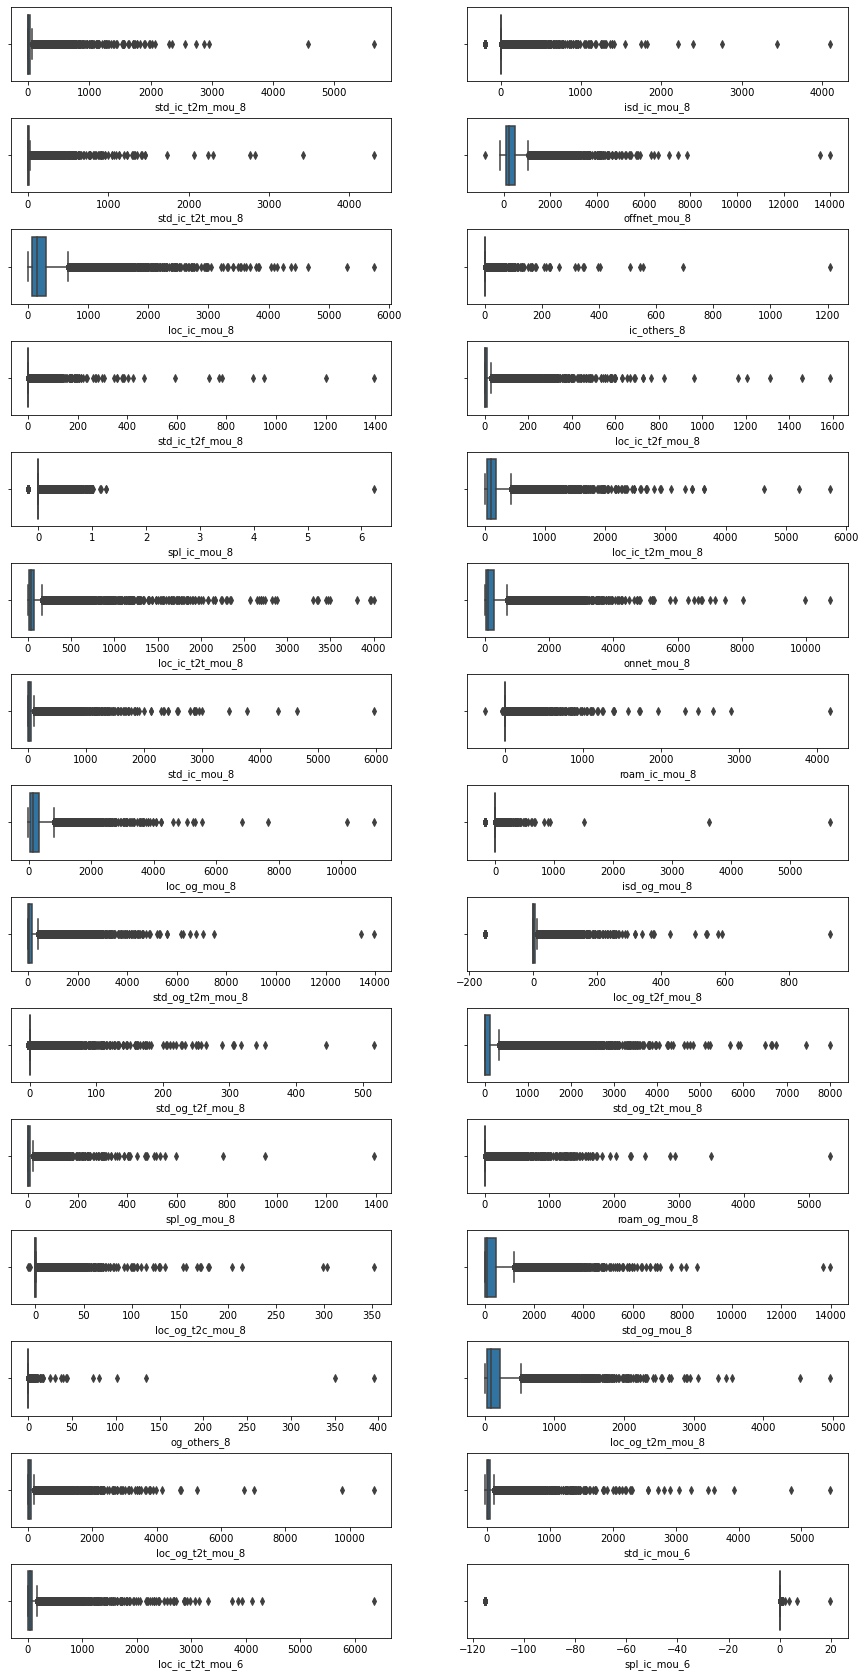

In [51]:
plt.figure(figsize=(15, 30))
for i,col in enumerate(num_cols[:30]):
    plt.subplot(15, 2, i+1)
    sns.boxplot(final_hvc[col])
    plt.subplots_adjust( hspace=0.5)
plt.show()

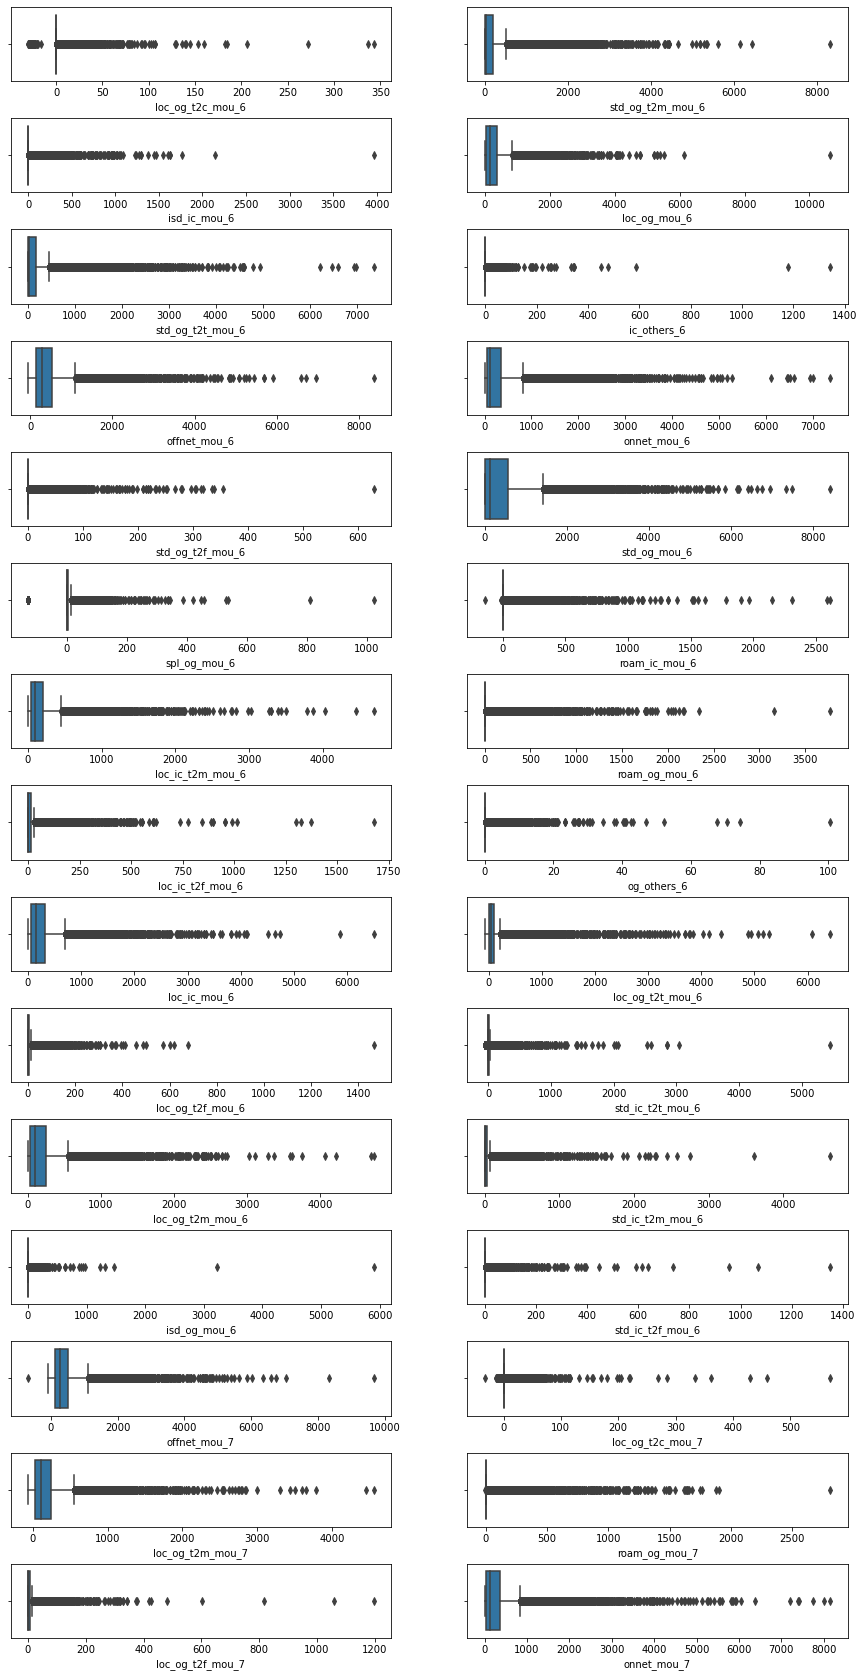

In [52]:
plt.figure(figsize=(15, 30))
for i,col in enumerate(num_cols[30:60]):
    plt.subplot(15, 2, i+1)
    sns.boxplot(final_hvc[col])
    plt.subplots_adjust( hspace=0.5)
plt.show()

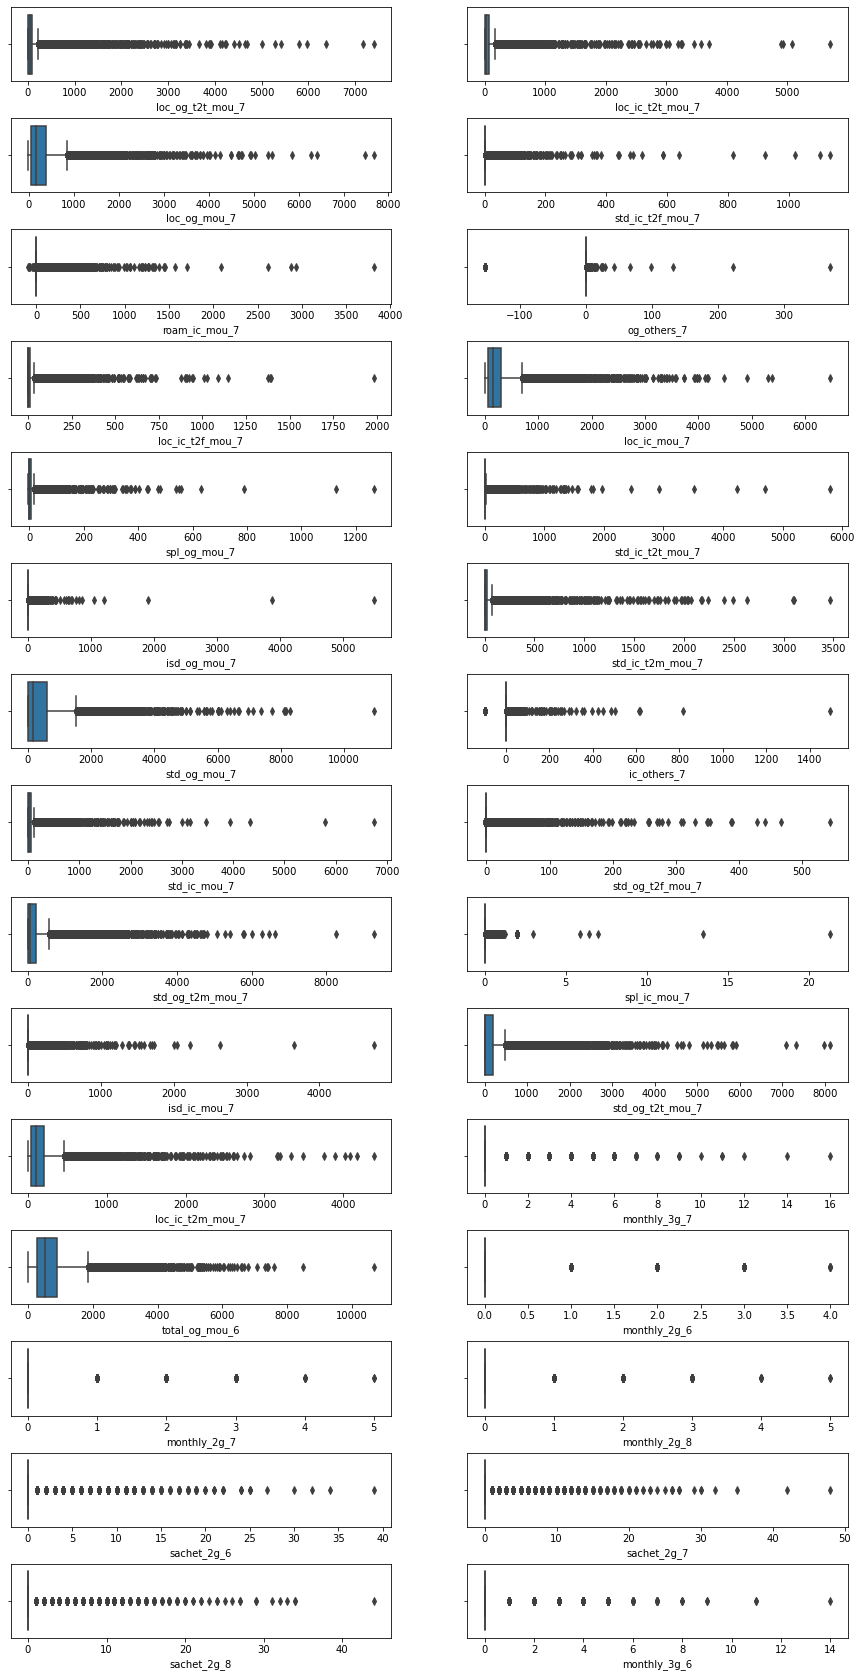

In [53]:
plt.figure(figsize=(15, 30))
for i,col in enumerate(num_cols[60:90]):
    plt.subplot(15, 2, i+1)
    sns.boxplot(final_hvc[col])
    plt.subplots_adjust( hspace=0.5)
plt.show()

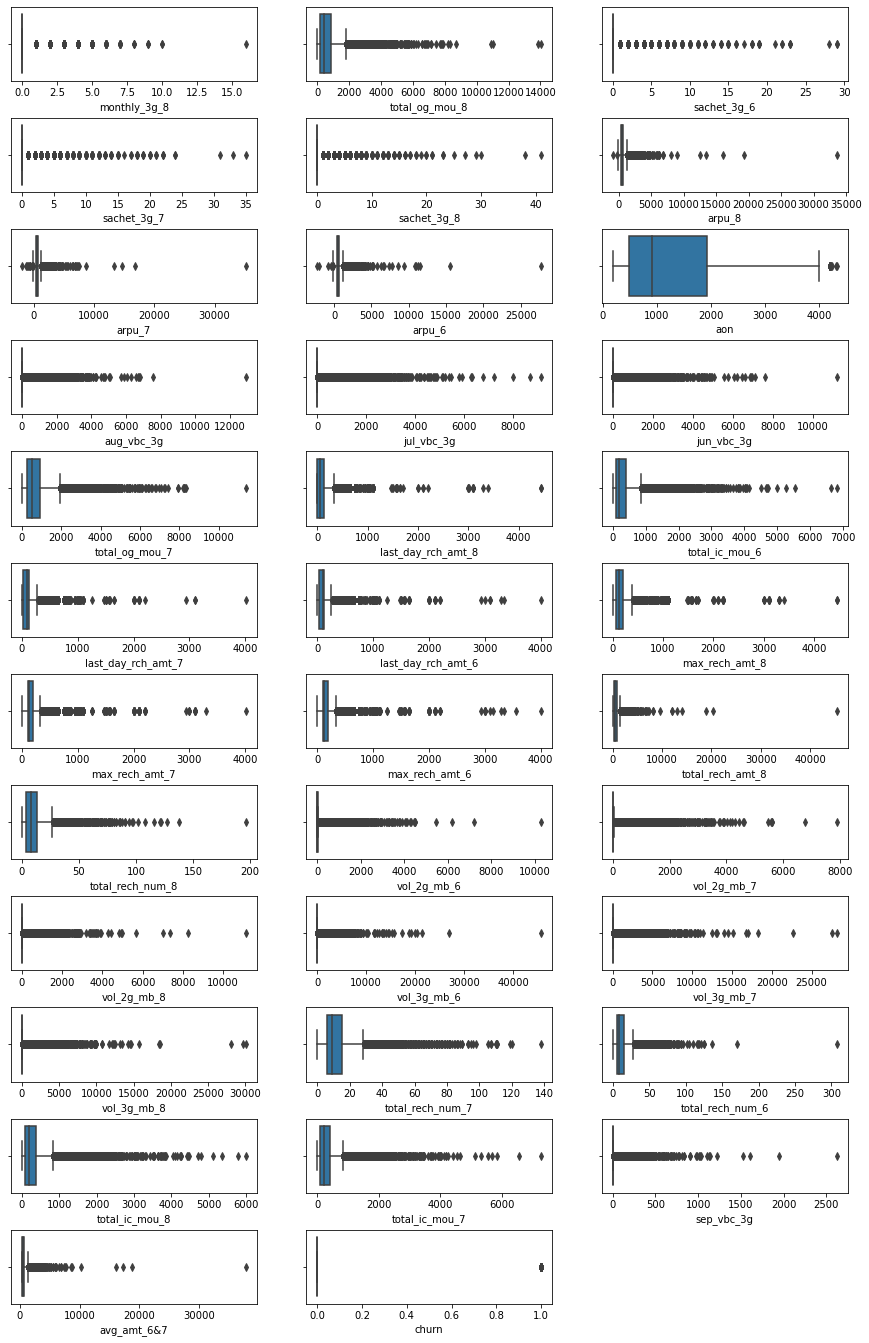

In [54]:
plt.figure(figsize=(15, 30))
for i,col in enumerate(num_cols[90:125]):
    plt.subplot(15, 3, i+1)
    sns.boxplot(final_hvc[col])
    plt.subplots_adjust( hspace=0.5)
plt.show()

Form the above box plots almost all features have outliers which needs to be treated before proceeding with model building

### 2. Outlier Treatment

In [229]:
## Soft Capping
for i in final_hvc:
    v1 = final_hvc[i].quantile(0.01)
    v99 = final_hvc[i].quantile(0.99)
    
    final_hvc[i][final_hvc[i]<=v1] = v1
    final_hvc[i][final_hvc[i]>=v99] = v99

In [56]:
imp_ic_mou_cols = [col for col in final_hvc if 'total_ic_mou'in col]
imp_og_mou_cols = [col for col in final_hvc if 'total_og_mou'in col]
roam_cols=[col for col in final_hvc if 'roam'in col]
other_imp_cols = ['avg_amt_6&7','aon']

#### Plotting columns with incoming MOU

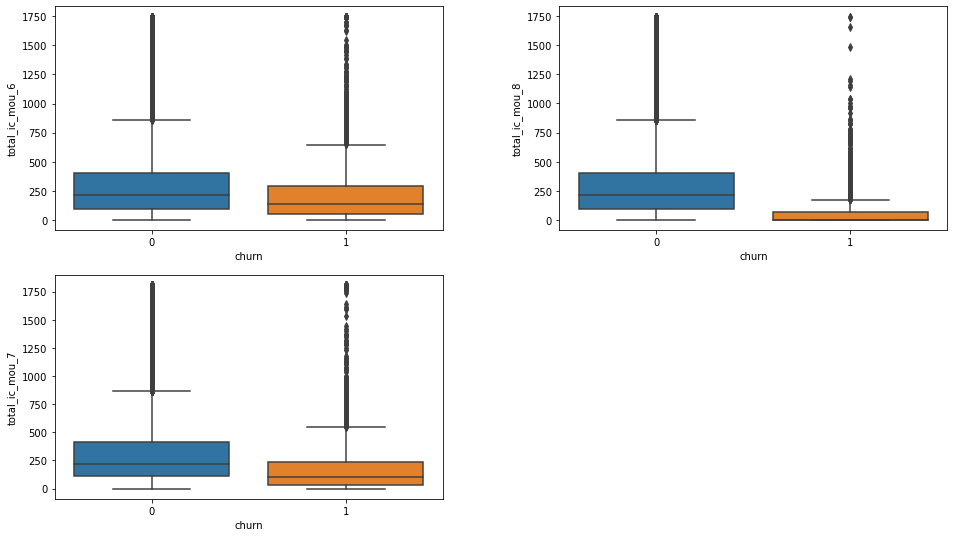

In [57]:
plt.figure(figsize=(16, 14))
for i,col in enumerate(imp_ic_mou_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=final_hvc[col], x=final_hvc['churn'])
    plt.subplots_adjust(wspace=0.3)
plt.show()

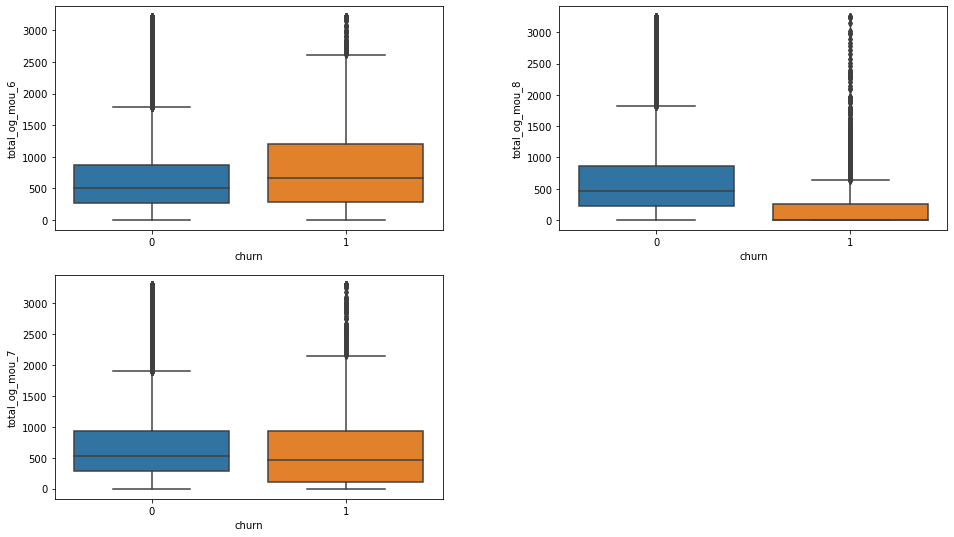

In [58]:
plt.figure(figsize=(16, 14))
for i,col in enumerate(imp_og_mou_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=final_hvc[col], x=final_hvc['churn'])
    plt.subplots_adjust(wspace=0.3)
plt.show()

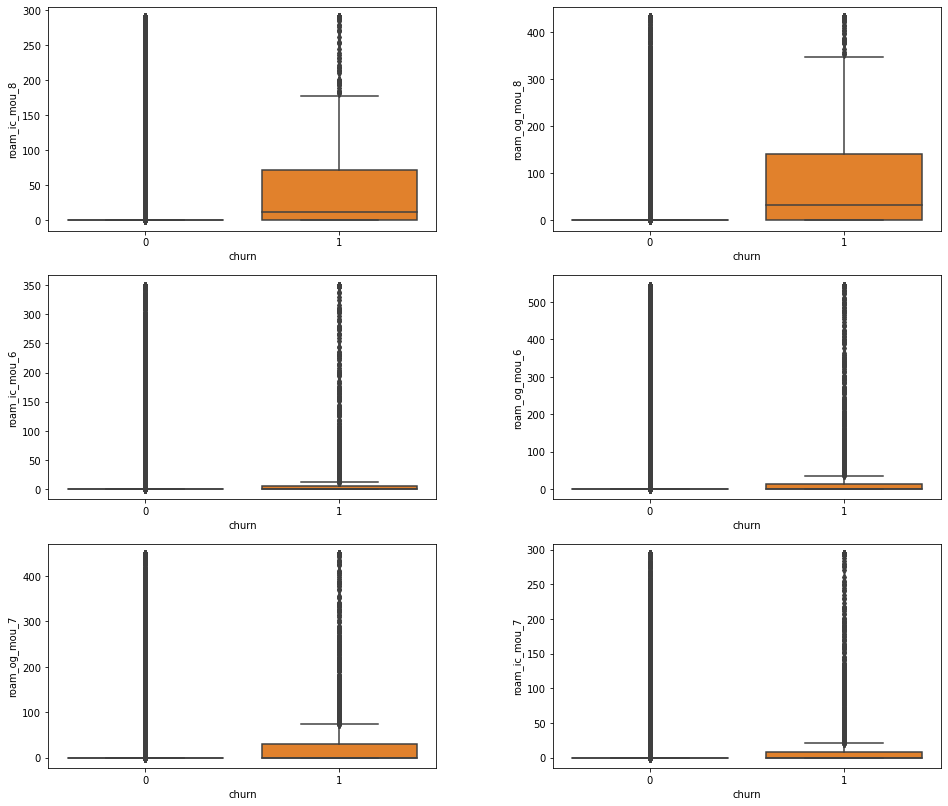

In [59]:
plt.figure(figsize=(16, 14))
for i,col in enumerate(roam_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=final_hvc[col], x=final_hvc['churn'])
    plt.subplots_adjust(wspace=0.3)
plt.show()

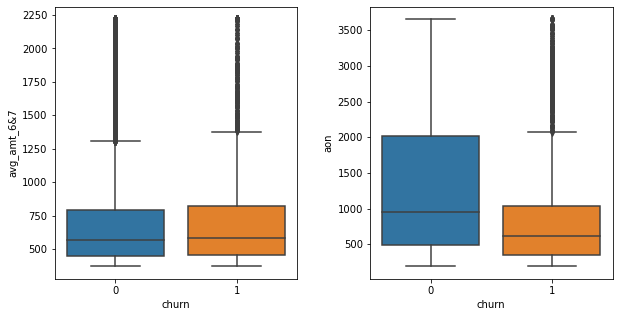

In [60]:
plt.figure(figsize=(10, 5))
for i,col in enumerate(other_imp_cols ):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=final_hvc[col], x=final_hvc['churn'])
    plt.subplots_adjust(wspace=0.3)
plt.show()

### Insights from above bivariate analysis

- As Age on network in high there is less change of customer getting churn.
- Customer with low minutes of usage for both incoming and outgoing have high chance of getting churn.
- We can also see that with people having usage roaming services in month of 8  have high of churn.

### 3. Multivariate analysis

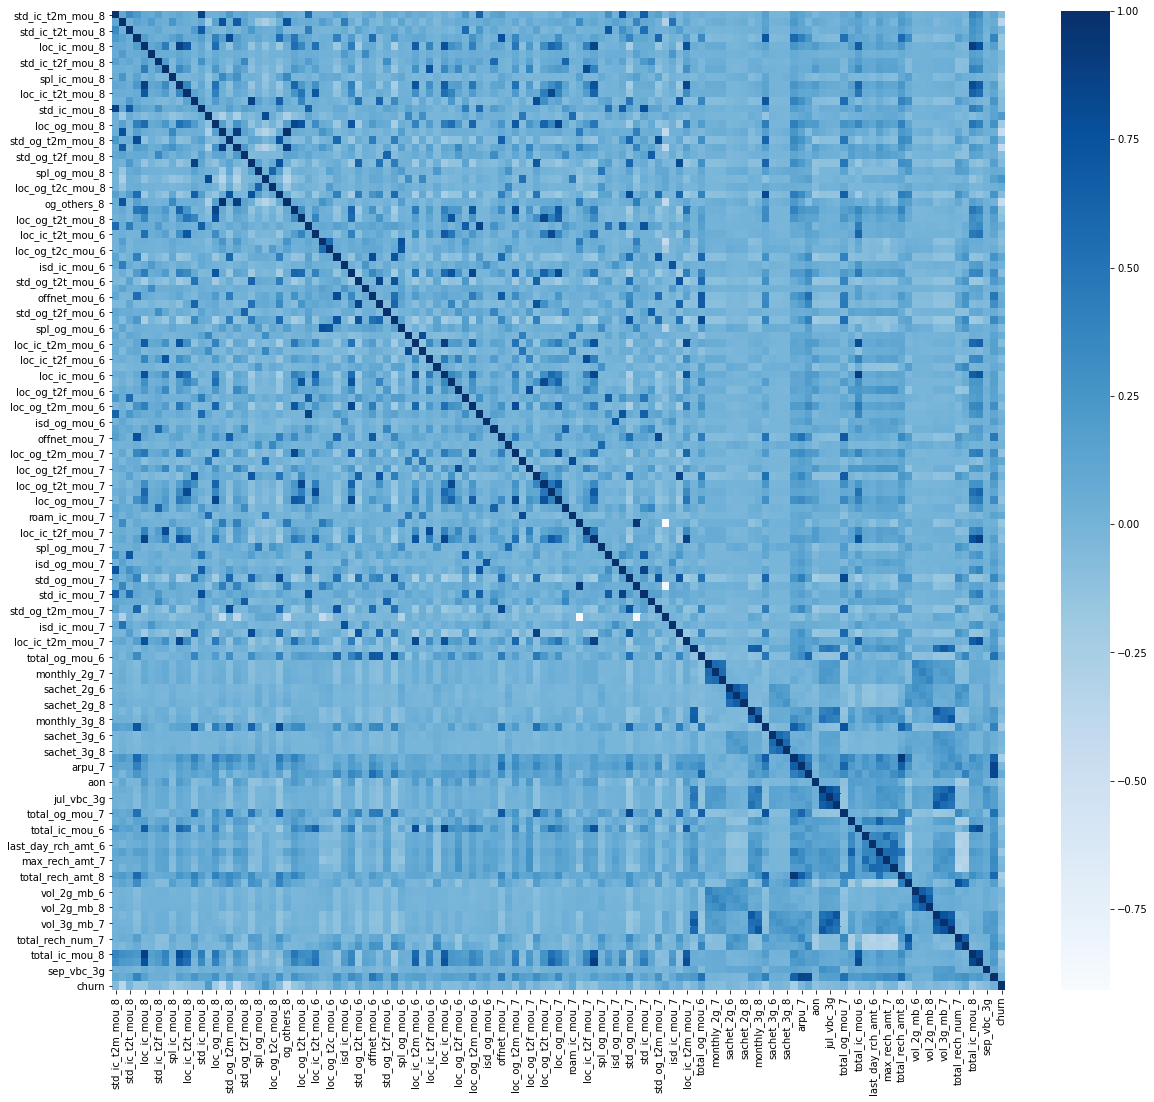

In [504]:
plt.figure(figsize=(20, 18))
sns.heatmap(final_hvc.corr(), cmap='Blues')
plt.show()

From the above heatmap we can observe that we have highly correlated variables and multicollinearity should be treated during model building part

## Model Building

In [103]:
# import required libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [463]:
y = final_hvc['churn']
X = final_hvc.drop('churn', axis=1)

In [464]:
# Split the data into train and test
df_train, df_test = train_test_split(final_hvc, train_size=0.8, stratify=final_hvc['churn'], random_state=100)

In [465]:
# Splitting the data into train and test
X_train = df_train.drop(columns=['churn'])
y_train = df_train['churn']

X_test = df_test.drop(columns=['churn'])
y_test = df_test['churn']

In [466]:
# Scaling the variables
scaler = StandardScaler()
X_train = pd.DataFrame(scaler._fittransform(X_train), columns=X_train.columns, index=X_train.index)
X_test= pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### 1. Model-1: Logistic Regression

In [359]:
# Initial logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23883
Model Family:                Binomial   Df Model:                          124
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4126.3
Date:                Tue, 07 Jun 2022   Deviance:                       8252.6
Time:                        19:47:09   Pearson chi2:                 9.02e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.2169
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1062      0.077    -53.552      0.000      -4.256      -3.956
std_ic_t2m_mou_8      -0.2538      0.165     -1.537      0.124      -0.577       0.070
isd_ic_mou_8           0.1651      0.120      1.381      0.167      -0.069       0.399
std_ic_t2t_mou_8      -0.3413      0.117     -2.925      0.003      -0.570      -0.113
offnet_mou_8          -0.5511      0.235     -2.343      0.019      -1.012      -0.090
loc_ic_mou_8           0.9494      0.554      1.714      0.087      -0.136       2.035
ic_others_8           -0.0108      0.049     -0.222      0.824      -0.106       0.084
std_ic_t2f_mou_8      -0.1122      0.070     -1.613      0.107      -0.249       0.024
loc_ic_t2f_mou_8      -0.2460      0.111     -2.209      0.027      -0.464      -0.028
spl_ic_mou_8          -0.5333      0.078     -6.795      0.000      -0.687      -0.380
loc_ic_t2m_mou_8      -1.3966      0.294     -4.756      0.000      -1.972      -0.821
loc_ic_t2t_mou_8      -0.6258      0.207     -3.023      0.003      -1.032      -0.220
onnet_mou_8           -0.2238      0.252     -0.887      0.375      -0.718       0.271
std_ic_mou_8           0.3931      0.268      1.468      0.142      -0.132       0.918
roam_ic_mou_8         -0.0400      0.042     -0.956      0.339      -0.122       0.042
loc_og_mou_8           0.6921      0.655      1.056      0.291      -0.592       1.976
isd_og_mou_8           0.2095      0.438      0.478      0.633      -0.650       1.069
std_og_t2m_mou_8      -0.6245      0.271     -2.306      0.021      -1.155      -0.094
loc_og_t2f_mou_8       0.0543      0.185      0.293      0.769      -0.308       0.417
std_og_t2f_mou_8      -0.1233      0.073     -1.681      0.093      -0.267       0.020
std_og_t2t_mou_8      -0.8554      0.299     -2.863      0.004      -1.441      -0.270
spl_og_mou_8          -0.0353      0.057     -0.615      0.539      -0.148       0.077
roam_og_mou_8          0.1853      0.054      3.451      0.001       0.080       0.290
loc_og_t2c_mou_8       0.0361      0.046      0.793      0.428      -0.053       0.125
std_og_mou_8           1.6410      0.756      2.170      0.030       0.159       3.123
og_others_8           -0.7649      0.443     -1.728      0.084      -1.633       0.103
loc_og_t2m_mou_8      -0.2531      0.351     -0.720      0.471      -0.942       0.435
loc_og_t2t_mou_8      -0.4624      0.278     -1.664      0.096      -1.007       0.082
std_ic_mou_6           0.0932      0.188      0.496      0.620      -0.275       0.462
loc_ic_t2t_mou_6       0.2834      0.144      1.966      0.049       0.001       0.566
spl_ic_mou_6          -0.0252      0.050     -0.507      0.612      -0.123       0.072
loc_og_t2c_mou_6       0.0159      0.044      0.362      0.717      -0.070       0.102
std_og_t2m_mou_6       0.1331      0.1

### Feature Selection Using RFE

In [360]:
# Create LR object
logreg = LogisticRegression(random_state=100)

# Run RFE for 25 features
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [362]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('std_ic_t2m_mou_8', False, 11),
 ('isd_ic_mou_8', False, 32),
 ('std_ic_t2t_mou_8', False, 19),
 ('offnet_mou_8', False, 4),
 ('loc_ic_mou_8', False, 30),
 ('ic_others_8', False, 95),
 ('std_ic_t2f_mou_8', False, 52),
 ('loc_ic_t2f_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('onnet_mou_8', False, 15),
 ('std_ic_mou_8', False, 29),
 ('roam_ic_mou_8', False, 79),
 ('loc_og_mou_8', False, 13),
 ('isd_og_mou_8', False, 81),
 ('std_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 84),
 ('std_og_t2f_mou_8', False, 28),
 ('std_og_t2t_mou_8', True, 1),
 ('spl_og_mou_8', False, 72),
 ('roam_og_mou_8', False, 12),
 ('loc_og_t2c_mou_8', False, 73),
 ('std_og_mou_8', True, 1),
 ('og_others_8', True, 1),
 ('loc_og_t2m_mou_8', False, 14),
 ('loc_og_t2t_mou_8', True, 1),
 ('std_ic_mou_6', False, 36),
 ('loc_ic_t2t_mou_6', False, 10),
 ('spl_ic_mou_6', False, 83),
 ('loc_og_t2c_mou_6', False, 93),
 ('std_og_t2m_mou_6', False, 4

In [364]:
col = X_train.columns[rfe.support_]
col

Index(['loc_ic_t2f_mou_8', 'spl_ic_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_mou_8', 'og_others_8', 'loc_og_t2t_mou_8', 'offnet_mou_6',
       'onnet_mou_6', 'loc_og_t2m_mou_7', 'loc_ic_mou_7', 'total_og_mou_6',
       'monthly_2g_8', 'monthly_3g_8', 'arpu_7', 'last_day_rch_amt_8',
       'total_rech_num_8', 'sep_vbc_3g'],
      dtype='object')

### Model-2: Logistic Regression Model with RFE Columns

In [369]:
len(X_train_sm.columns)

21

In [365]:
# Build model with RFE selected features
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23987
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4305.9
Date:                Tue, 07 Jun 2022   Deviance:                       8611.8
Time:                        19:50:54   Pearson chi2:                 1.07e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.2051
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0263      0.074    -54.173      0.000      -4.172      -3.881
loc_ic_t2f_mou_8      -0.3982      0.076     -5.207      0.000      -0.548      -0.248
spl_ic_mou_8          -0.5346      0.078     -6.829      0.000      -0.688      -0.381
loc_ic_t2m_mou_8      -1.4451      0.104    -13.891      0.000      -1.649      -1.241
loc_ic_t2t_mou_8      -0.6470      0.086     -7.539      0.000      -0.815      -0.479
std_og_t2m_mou_8      -0.8873      0.169     -5.239      0.000      -1.219      -0.555
std_og_t2t_mou_8      -0.9715      0.174     -5.571      0.000      -1.313      -0.630
std_og_mou_8           0.8375      0.247      3.385      0.001       0.353       1.322
og_others_8           -0.5695      0.033    -17.405      0.000      -0.634      -0.505
loc_og_t2t_mou_8      -0.4150      0.078     -5.323      0.000      -0.568      -0.262
offnet_mou_6           0.5079      0.068      7.489      0.000       0.375       0.641
onnet_mou_6            0.5320      0.068      7.860      0.000       0.399       0.665
loc_og_t2m_mou_7      -0.3983      0.054     -7.416      0.000      -0.504      -0.293
loc_ic_mou_7           0.6828      0.067     10.195      0.000       0.552       0.814
total_og_mou_6        -0.4854      0.090     -5.415      0.000      -0.661      -0.310
monthly_2g_8          -0.5261      0.066     -7.944      0.000      -0.656      -0.396
monthly_3g_8          -0.6481      0.069     -9.460      0.000      -0.782      -0.514
arpu_7                 0.4467      0.033     13.681      0.000       0.383       0.511
last_day_rch_amt_8    -0.5605      0.046    -12.231      0.000      -0.650      -0.471
total_rech_num_8      -0.3932      0.045     -8.826      0.000      -0.480      -0.306
sep_vbc_3g            -0.9301      0.210     -4.439      0.000      -1.341      -0.519
======================================================================================
"""

In [370]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,std_og_mou_8,57.55
5,std_og_t2t_mou_8,26.98
4,std_og_t2m_mou_8,25.41
13,total_og_mou_6,18.53
9,offnet_mou_6,10.54
10,onnet_mou_6,10.37
12,loc_ic_mou_7,3.81
2,loc_ic_t2m_mou_8,2.60
3,loc_ic_t2t_mou_8,2.04
11,loc_og_t2m_mou_7,1.96


### Model-3: Logistic Regression Model after dropping high VIF column

In [371]:
# Drop 'std_og_mou_8'
col = col.drop('std_og_mou_8', 1)

In [372]:
# Build new model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23988
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4310.8
Date:                Tue, 07 Jun 2022   Deviance:                       8621.5
Time:                        19:52:37   Pearson chi2:                 1.06e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.2047
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0230      0.074    -54.128      0.000      -4.169      -3.877
loc_ic_t2f_mou_8      -0.3945      0.077     -5.156      0.000      -0.544      -0.245
spl_ic_mou_8          -0.5365      0.078     -6.856      0.000      -0.690      -0.383
loc_ic_t2m_mou_8      -1.4479      0.104    -13.883      0.000      -1.652      -1.244
loc_ic_t2t_mou_8      -0.6492      0.086     -7.539      0.000      -0.818      -0.480
std_og_t2m_mou_8      -0.3447      0.044     -7.776      0.000      -0.432      -0.258
std_og_t2t_mou_8      -0.4084      0.044     -9.224      0.000      -0.495      -0.322
og_others_8           -0.5693      0.033    -17.396      0.000      -0.633      -0.505
loc_og_t2t_mou_8      -0.4159      0.078     -5.318      0.000      -0.569      -0.263
offnet_mou_6           0.5002      0.068      7.319      0.000       0.366       0.634
onnet_mou_6            0.5228      0.068      7.670      0.000       0.389       0.656
loc_og_t2m_mou_7      -0.3989      0.054     -7.426      0.000      -0.504      -0.294
loc_ic_mou_7           0.6835      0.067     10.196      0.000       0.552       0.815
total_og_mou_6        -0.4726      0.090     -5.222      0.000      -0.650      -0.295
monthly_2g_8          -0.5240      0.066     -7.909      0.000      -0.654      -0.394
monthly_3g_8          -0.6489      0.069     -9.469      0.000      -0.783      -0.515
arpu_7                 0.4559      0.033     14.010      0.000       0.392       0.520
last_day_rch_amt_8    -0.5581      0.046    -12.191      0.000      -0.648      -0.468
total_rech_num_8      -0.3901      0.044     -8.780      0.000      -0.477      -0.303
sep_vbc_3g            -0.9295      0.209     -4.443      0.000      -1.340      -0.519
======================================================================================
"""

In [373]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,total_og_mou_6,18.38
8,offnet_mou_6,10.46
9,onnet_mou_6,10.29
11,loc_ic_mou_7,3.81
2,loc_ic_t2m_mou_8,2.60
3,loc_ic_t2t_mou_8,2.04
10,loc_og_t2m_mou_7,1.96
5,std_og_t2t_mou_8,1.72
4,std_og_t2m_mou_8,1.63
15,arpu_7,1.62


### Model-4: Logistic Regression Model after dropping high VIF column

In [374]:
# Drop 'std_og_mou_8'
col = col.drop('total_og_mou_6', 1)

In [375]:
# Build new model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23989
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4324.1
Date:                Tue, 07 Jun 2022   Deviance:                       8648.2
Time:                        19:52:53   Pearson chi2:                 1.06e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.2039
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0155      0.074    -54.033      0.000      -4.161      -3.870
loc_ic_t2f_mou_8      -0.4011      0.077     -5.209      0.000      -0.552      -0.250
spl_ic_mou_8          -0.5382      0.078     -6.882      0.000      -0.692      -0.385
loc_ic_t2m_mou_8      -1.4478      0.105    -13.787      0.000      -1.654      -1.242
loc_ic_t2t_mou_8      -0.6360      0.085     -7.449      0.000      -0.803      -0.469
std_og_t2m_mou_8      -0.3661      0.044     -8.258      0.000      -0.453      -0.279
std_og_t2t_mou_8      -0.4119      0.044     -9.307      0.000      -0.499      -0.325
og_others_8           -0.5700      0.033    -17.431      0.000      -0.634      -0.506
loc_og_t2t_mou_8      -0.4179      0.077     -5.446      0.000      -0.568      -0.267
offnet_mou_6           0.1750      0.029      6.087      0.000       0.119       0.231
onnet_mou_6            0.1987      0.029      6.897      0.000       0.142       0.255
loc_og_t2m_mou_7      -0.4079      0.054     -7.593      0.000      -0.513      -0.303
loc_ic_mou_7           0.6651      0.067      9.947      0.000       0.534       0.796
monthly_2g_8          -0.5242      0.066     -7.958      0.000      -0.653      -0.395
monthly_3g_8          -0.6537      0.068     -9.561      0.000      -0.788      -0.520
arpu_7                 0.4689      0.032     14.454      0.000       0.405       0.533
last_day_rch_amt_8    -0.5358      0.045    -11.865      0.000      -0.624      -0.447
total_rech_num_8      -0.3843      0.044     -8.690      0.000      -0.471      -0.298
sep_vbc_3g            -0.9342      0.209     -4.461      0.000      -1.345      -0.524
======================================================================================
"""

In [376]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,loc_ic_mou_7,3.80
2,loc_ic_t2m_mou_8,2.59
3,loc_ic_t2t_mou_8,2.04
10,loc_og_t2m_mou_7,1.96
5,std_og_t2t_mou_8,1.72
9,onnet_mou_6,1.65
4,std_og_t2m_mou_8,1.63
14,arpu_7,1.61
8,offnet_mou_6,1.60
7,loc_og_t2t_mou_8,1.58


In [134]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

85513    0.069692
16315    0.896974
52011    0.000312
11796    0.026110
54301    0.016179
42494    0.021049
20732    0.048384
24054    0.107565
13984    0.064950
39486    0.064895
dtype: float64

In [135]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.96918513e-02, 8.96973941e-01, 3.11609009e-04, 2.61100358e-02,
       1.61787834e-02, 2.10492883e-02, 4.83835288e-02, 1.07564734e-01,
       6.49499842e-02, 6.48952272e-02])

In [136]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.069692
1,1,0.896974
2,0,0.000312
3,0,0.026110
4,0,0.016179


In [140]:
# Predict on train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted
0,0,0.069692,0
1,1,0.896974,1
2,0,0.000312,0
3,0,0.026110,0
4,0,0.016179,0


In [138]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
confusion

array([[21723,   211],
       [ 1343,   731]])

In [139]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted)

0.9352715761412862

In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
print("Sensitivity: ", TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))

Sensitivity:  0.3524590163934426
Specificity:  0.9903802316039026


In [144]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

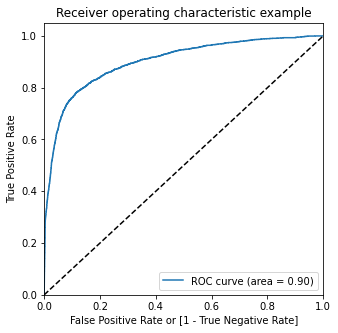

In [145]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Model 5: PCA and Logistic Regression 

In [420]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [421]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [151]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.67
1       20.83
2       26.80
3       31.72
4       36.23
5       40.18
6       43.90
7       46.75
8       49.48
9       51.96
10      54.30
11      56.57
12      58.70
13      60.64
14      62.53
15      64.23
16      65.74
17      67.17
18      68.51
19      69.79
20      71.07
21      72.18
22      73.23
23      74.25
24      75.24
25      76.17
26      77.04
27      77.85
28      78.63
29      79.39
30      80.10
31      80.81
32      81.50
33      82.18
34      82.84
35      83.48
36      84.10
37      84.71
38      85.30
39      85.87
40      86.41
41      86.93
42      87.46
43      87.97
44      88.46
45      88.91
46      89.34
47      89.76
48      90.15
49      90.54
50      90.91
51      91.27
52      91.63
53      91.97
54      92.31
55      92.62
56      92.93
57      93.22
58      93.50
59      93.77
60      94.04
61      94.30
62      94.56
63      94.80
64      95.04
65      95.27
66      95.51
67      95.74
68      95.96
69      96.18
70      96.39
71    

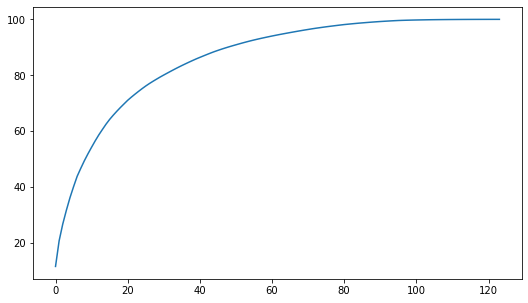

In [152]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [153]:
# create pipeline
PCA_VARS = 30
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [154]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8523825391536155

In [155]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
#sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
#print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4692  792]
 [  95  424]]
AUC:    	 0.9


In [156]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [157]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [158]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.724567,1.717374,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,1.769038,0.042299,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,1.628039,0.081677,0.060989,0.012483,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.902124,0.914287,0.907813,0.889370,0.905444,0.903807,0.008244,13
3,1.982176,0.055249,0.079336,0.015258,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.905425,0.914608,0.908037,0.889398,0.907662,0.905026,0.008393,1
4,1.218472,0.028563,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
5,1.600867,0.024295,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
6,1.582217,0.009451,0.063116,0.005468,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.901755,0.914685,0.908823,0.889149,0.905184,0.903919,0.008537,10
7,2.067588,0.069975,0.075341,0.017163,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.905610,0.914741,0.908414,0.888767,0.907200,0.904946,0.008663,7
8,1.284467,0.019387,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,1.612623,0.021158,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30


In [159]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
#sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
#print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4756  728]
 [  94  425]]
AUC:    	 0.9


### Model 6: Random Forest

In [377]:
from sklearn.ensemble import RandomForestClassifier

In [380]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [381]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [382]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)

In [383]:
sample_tree = rf.estimators_[4]

In [384]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [386]:
evaluate_model(rf)

Train Accuracy : 0.938437187604132
Train Confusion Matrix:
[[21769   165]
 [ 1313   761]]
--------------------------------------------------
Test Accuracy : 0.9333666500083292
Test Confusion Matrix:
[[5427   57]
 [ 343  176]]


#### Grid search for hyper-parameter tuning

In [423]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [425]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [15,20,30],
    'max_features': [2,3,4,5,10],
    'n_estimators': [25, 50, 75, 100]
}

In [402]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [396]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
CPU times: user 5.8 s, sys: 793 ms, total: 6.6 s
Wall time: 22min 39s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=20, n_estimators=50,
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [15, 20, 30],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='accuracy', verbose=1)

In [427]:
rf_best = grid_search.best_estimator_

In [428]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=20,
                       n_estimators=25, n_jobs=-1, oob_score=True,
                       random_state=42)

In [429]:
evaluate_model(rf_best)

Train Accuracy : 0.9145701432855715
Train Confusion Matrix:
[[21733   201]
 [ 1850   224]]
--------------------------------------------------
Test Accuracy : 0.9122105613859737
Test Confusion Matrix:
[[5426   58]
 [ 469   50]]


In [430]:
sample_tree = rf_best.estimators_[0]

### Variable importance in RandomForest and Decision trees

In [467]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20, n_estimators=50, oob_score=True)

In [469]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [470]:
classifier_rf.feature_importances_

array([0.00532804, 0.01799586, 0.00475069, 0.0132602 , 0.02687222,
       0.00259151, 0.00349924, 0.00645026, 0.03446969, 0.01920225,
       0.01131252, 0.0080346 , 0.01363356, 0.02825544, 0.05289781,
       0.02219043, 0.00603208, 0.01304569, 0.01702205, 0.00470109,
       0.00538426, 0.02117835, 0.004821  , 0.00740227, 0.01590411,
       0.01717136, 0.00981956, 0.00735064, 0.00677286, 0.00415829,
       0.00378704, 0.00578433, 0.00276632, 0.00731484, 0.00662362,
       0.00303379, 0.00918258, 0.0074071 , 0.00186366, 0.0079979 ,
       0.00549767, 0.00348113, 0.00735713, 0.00361056, 0.00542224,
       0.00340996, 0.00690891, 0.00745248, 0.00336013, 0.00568591,
       0.00693907, 0.0059428 , 0.00235498, 0.00217176, 0.00865757,
       0.00350435, 0.00706117, 0.00748604, 0.00364988, 0.00856482,
       0.00751397, 0.00747927, 0.00735527, 0.00281716, 0.00746904,
       0.00051358, 0.00497564, 0.00892344, 0.00554401, 0.00563095,
       0.00211801, 0.00559713, 0.00979619, 0.00306139, 0.00695

In [471]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [472]:
imp_df=imp_df.sort_values(by="Imp", ascending=False).reset_index()

In [473]:
#Top 10 features from random tree classifier
top_10_features = list(imp_df['Varname'][:10])
top_10_features

['loc_og_mou_8',
 'total_og_mou_8',
 'total_rech_amt_8',
 'spl_ic_mou_8',
 'roam_ic_mou_8',
 'arpu_8',
 'loc_ic_mou_8',
 'isd_og_mou_8',
 'roam_og_mou_8',
 'last_day_rch_amt_8']

### Model 7: Logistic Regression Model with top 10 features of PCA

In [474]:
X_train_logreg = X_train[top_10_features]
X_test_logreg = X_test[top_10_features]

In [475]:
X_train_logreg.shape

(24008, 10)

In [476]:
logistic_final = LogisticRegression()

In [478]:
logistic_final.fit(X_train_logreg,y_train)

LogisticRegression()

In [479]:
y_test_pred = logistic_final.predict(X_test_logreg)

In [480]:
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [481]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.columns = ["Predicted"]

In [482]:
# Let's see the head
y_pred_1.head()

,Predicted
0,0
1,0
2,0
3,0
4,0


In [484]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [485]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [486]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [487]:
y_pred_final['final_predicted'] = y_pred_final.Predicted.map(lambda x: 1 if x > 0.42 else 0)

In [488]:
y_pred_final.head()

,churn,Predicted,final_predicted
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [489]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.9293686490088289

In [490]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[5437,   47],
       [ 377,  142]])

In [491]:
logistic_final.coef_[0]

array([-0.5112477 , -0.0481082 , -0.52477994, -0.61777993,  0.01820825,
       -0.12253594, -1.25786197, -0.27013372,  0.34078346, -0.56460457])

In [497]:
X_train_logreg.columns

Index(['loc_og_mou_8', 'total_og_mou_8', 'total_rech_amt_8', 'spl_ic_mou_8',
       'roam_ic_mou_8', 'arpu_8', 'loc_ic_mou_8', 'isd_og_mou_8',
       'roam_og_mou_8', 'last_day_rch_amt_8'],
      dtype='object')

In [499]:
Intr_df = pd.DataFrame(logistic_final.coef_[0],X_train_logreg.columns).reset_index()

In [501]:
Intr_df.columns = ["Features","Coefficients"]
Intr_df

,Features,Coefficients
0,loc_og_mou_8,-0.511248
1,total_og_mou_8,-0.048108
2,total_rech_amt_8,-0.524780
3,spl_ic_mou_8,-0.617780
4,roam_ic_mou_8,0.018208
5,arpu_8,-0.122536
6,loc_ic_mou_8,-1.257862
7,isd_og_mou_8,-0.270134
8,roam_og_mou_8,0.340783
9,last_day_rch_amt_8,-0.564605


## Final Interpretation:

- Based on prominent features from PCA  using along with logistic regression have high accuracy.
- From the above interpretable model we can conclude the following:
    <h5><font color='orange'>1. It can be concluded that the customer is less likely to churn when local and isd outgoing usage for the 8th month is higher.</h5>
    <h5><font color='orange'>2. It can concluded that there is a inversely proportional relationship between total recharge amount and churning actvity of customer.</h5>
   <h5><font color='orange'>3. It can be seen from above model coefficients,customer's with high incoming/outgoing roaming are more likely to churn.</h5>
    <h5><font color='orange'>4. It is observed that customers with special packages for incoming calls are less interested in switching to other service providers.</h5>
    <h5><font color='orange'>5. We can conclude that with high AON(Age on network) customer is less likely to churn and customer with less AON is having high chance to get churned.</h5>

## Recommendations:

<h5><font color='green'> 1. The roaming rates are something that a telecom business must consider. Customers that use services from a roaming zone must be offered with attractive deals which inturn makes customer to stay in network.</h5>
<h5><font color='green'> 2. Cusomter having low activity/revenue in past 2 months should be provided with more attractive offers to avoid churning.</h5>
<h5><font color='green'> 3. More marketing/feedback activity should be focused on customers with high revenue and low usage</h5>